In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [238]:
data=pd.read_csv(r"C:\Users\navgurukul\Downloads\quikr_car.csv")
data

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
887,Ta,Tara,zest,"3,10,000",NaN,NaN
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel
890,Honda Amaze 1.2 E i VTEC,Honda,2014,"1,80,000",Petrol,NaN


# Data Cleaning

In [5]:
data.isnull().sum()

name           0
company        0
year           0
Price          0
kms_driven    52
fuel_type     55
dtype: int64

In [239]:
cars = data.dropna(subset=['kms_driven', 'fuel_type'])

In [137]:
cars.duplicated().sum()

92

In [138]:
cars.drop_duplicates()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel
...,...,...,...,...,...,...
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,"2,70,000","50,000 kms",Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,"1,10,000","30,000 kms",Diesel
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel


# Exploratory Data Analysis

In [240]:
cars.head()

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,"80,000","45,000 kms",Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,"4,25,000",40 kms,Diesel
2,Maruti Suzuki Alto 800 Vxi,Maruti,2018,Ask For Price,"22,000 kms",Petrol
3,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,"3,25,000","28,000 kms",Petrol
4,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,"5,75,000","36,000 kms",Diesel


In [140]:
cars.tail()

,name,company,year,Price,kms_driven,fuel_type
883,Maruti Suzuki Ritz VXI ABS,Maruti,2011,"2,70,000","50,000 kms",Petrol
885,Tata Indica V2 DLE BS III,Tata,2009,"1,10,000","30,000 kms",Diesel
886,Toyota Corolla Altis,Toyota,2009,"3,00,000","1,32,000 kms",Petrol
888,Tata Zest XM Diesel,Tata,2018,"2,60,000","27,000 kms",Diesel
889,Mahindra Quanto C8,Mahindra,2013,"3,90,000","40,000 kms",Diesel


In [141]:
cars.sample(5)

,name,company,year,Price,kms_driven,fuel_type
753,Tata Indica eV2 eXeta eGLX,Tata,2012,"85,000","55,000 kms",Diesel
53,Maruti Suzuki Swift Vdi BSIII,Maruti,2017,"1,80,000","15,487 kms",Petrol
861,Hyundai Getz Prime 1.3 GLX,Hyundai,2009,"1,15,000","20,000 kms",Petrol
696,BMW X1,BMW,2011,"10,00,000","34,000 kms",Diesel
663,Ford EcoSport Trend 1.5L Ti VCT,Ford,2014,"4,65,000","47,000 kms",Petrol


In [144]:
cars.shape

(837, 6)

In [241]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 837 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        837 non-null    object
 1   company     837 non-null    object
 2   year        837 non-null    object
 3   Price       837 non-null    object
 4   kms_driven  837 non-null    object
 5   fuel_type   837 non-null    object
dtypes: object(6)
memory usage: 45.8+ KB


In [254]:
# reset index


cars.reset_index(drop=True)

,name,company,year,Price,kms_driven,fuel_type
0,Hyundai Santro Xing XO eRLX Euro III,Hyundai,2007,80000,45000,Petrol
1,Mahindra Jeep CL550 MDI,Mahindra,2006,425000,40,Diesel
2,Hyundai Grand i10 Magna 1.2 Kappa VTVT,Hyundai,2014,325000,28000,Petrol
3,Ford EcoSport Titanium 1.5L TDCi,Ford,2014,575000,36000,Diesel
4,Ford Figo,Ford,2012,175000,41000,Diesel
...,...,...,...,...,...,...
811,Maruti Suzuki Ritz VXI ABS,Maruti,2011,270000,50000,Petrol
812,Tata Indica V2 DLE BS III,Tata,2009,110000,30000,Diesel
813,Toyota Corolla Altis,Toyota,2009,300000,132000,Petrol
814,Tata Zest XM Diesel,Tata,2018,260000,27000,Diesel


In [242]:
cars.loc[:, 'fuel_type'] = cars['fuel_type'].astype('category')

In [243]:
cars.loc[:, 'year'] = cars['year'].astype('int')

In [244]:
# Price has Ask for Price so we have to remove then change datatype


cars=cars[cars['Price']!='Ask For Price']
cars['Price']=cars['Price'].str.replace(',','').astype(int)

In [245]:
#kms_driven has object values with kms at last


cars['kms_driven']=cars['kms_driven'].str.split().str.get(0).str.replace(',','')
cars['kms_driven']=cars['kms_driven'].astype(int)

In [250]:
cars['year'] = pd.to_numeric(cars['year'], errors='coerce').astype('Int64')

In [251]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
Index: 816 entries, 0 to 889
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        816 non-null    object
 1   company     816 non-null    object
 2   year        816 non-null    Int64 
 3   Price       816 non-null    int32 
 4   kms_driven  816 non-null    int32 
 5   fuel_type   816 non-null    object
dtypes: Int64(1), int32(2), object(3)
memory usage: 39.0+ KB


In [173]:
cars.describe(include='all')

,name,company,year,Price,kms_driven,fuel_type
count,816,816,816.0,8.160000e+02,816.000000,816
unique,463,25,<NA>,NaN,NaN,3
top,Honda City,Maruti,<NA>,NaN,NaN,Petrol
freq,13,221,<NA>,NaN,NaN,428
mean,NaN,NaN,2012.444853,4.117176e+05,46275.531863,NaN
std,NaN,NaN,4.002992,4.751844e+05,34297.428044,NaN
min,NaN,NaN,1995.0,3.000000e+04,0.000000,NaN
25%,NaN,NaN,2010.0,1.750000e+05,27000.000000,NaN
50%,NaN,NaN,2013.0,2.999990e+05,41000.000000,NaN
75%,NaN,NaN,2015.0,4.912500e+05,56818.500000,NaN


In [113]:
cars['name'] = cars['name'].str.strip()
cars['name'] = cars['name'].str.split().str.slice(stop=3).str.join(' ')

In [174]:
cars['company'].unique()

array(['Hyundai', 'Mahindra', 'Ford', 'Maruti', 'Skoda', 'Audi', 'Toyota',
       'Renault', 'Honda', 'Datsun', 'Mitsubishi', 'Tata', 'Volkswagen',
       'Chevrolet', 'Mini', 'BMW', 'Nissan', 'Hindustan', 'Fiat', 'Force',
       'Mercedes', 'Land', 'Jaguar', 'Jeep', 'Volvo'], dtype=object)

# Checking relationship of Company with Price

C:\Users\navgurukul\AppData\Local\Temp\ipykernel_3572\662249546.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.boxplot(x='company',y='Price',data=cars,palette='Set3')
C:\Users\navgurukul\AppData\Local\Temp\ipykernel_3572\662249546.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')


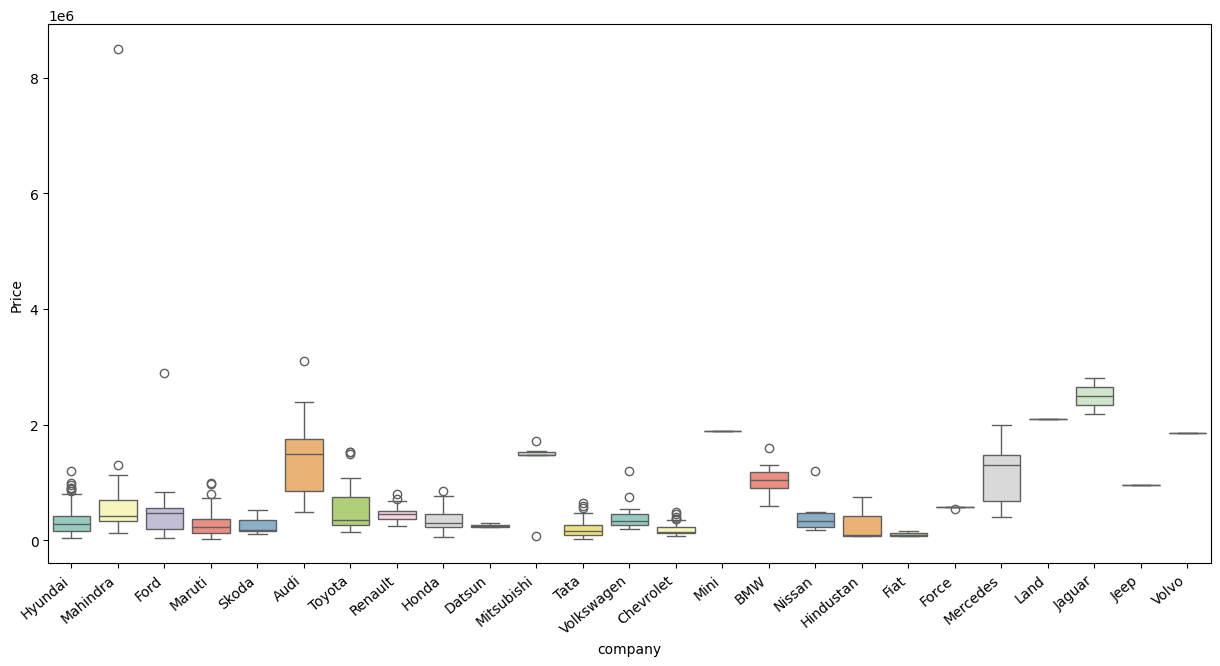

In [175]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='company',y='Price',data=cars,palette='Set3')
ax.set_xticklabels(ax.get_xticklabels(),rotation=40,ha='right')
plt.show()


# Checking relationship of Year with Price

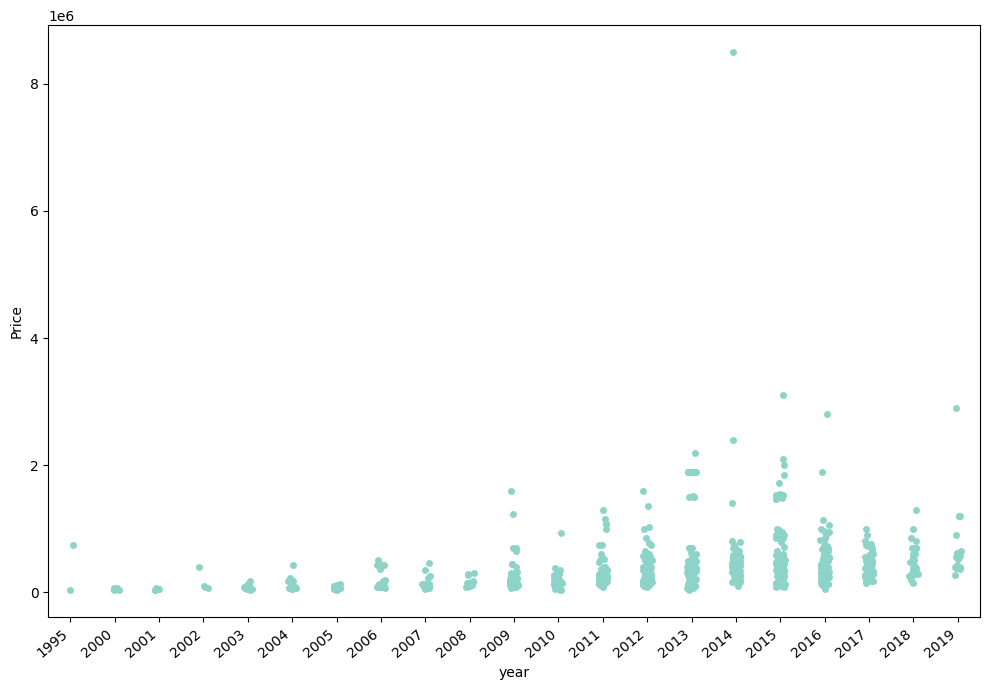

In [183]:
plt.subplots(figsize=(10,7))
sns.stripplot(x='year', y='Price', data=cars, jitter=True)
plt.xticks(rotation=40, ha='right')
plt.tight_layout()
plt.show()


# Checking relationship of kms_driven with Price

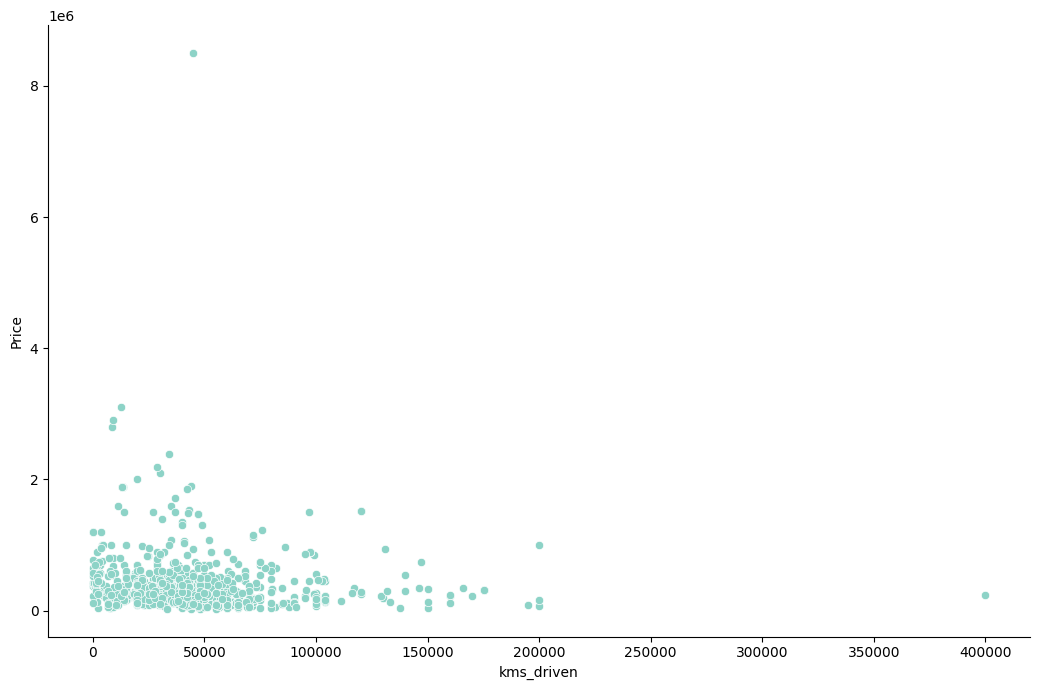

In [184]:
sns.relplot(x='kms_driven',y='Price',data=cars,height=7,aspect=1.5)

# Checking relationship of Fuel Type with Price

<Axes: xlabel='fuel_type', ylabel='Price'>

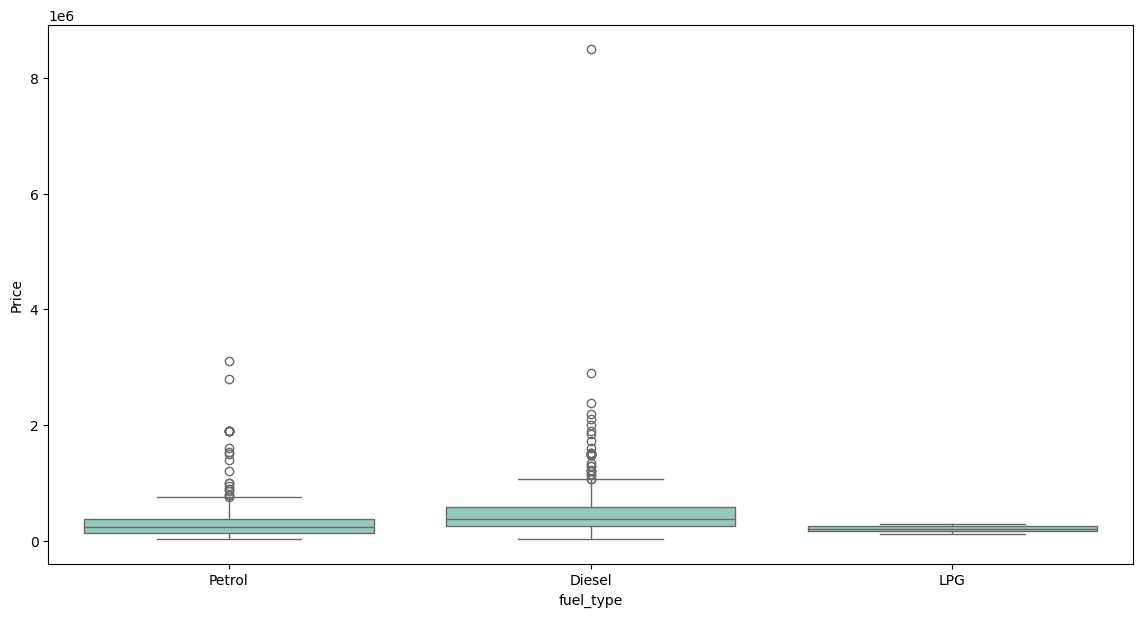

In [185]:
plt.subplots(figsize=(14,7))
sns.boxplot(x='fuel_type',y='Price',data=cars)

# Relationship of Price with FuelType, Year and Company mixed

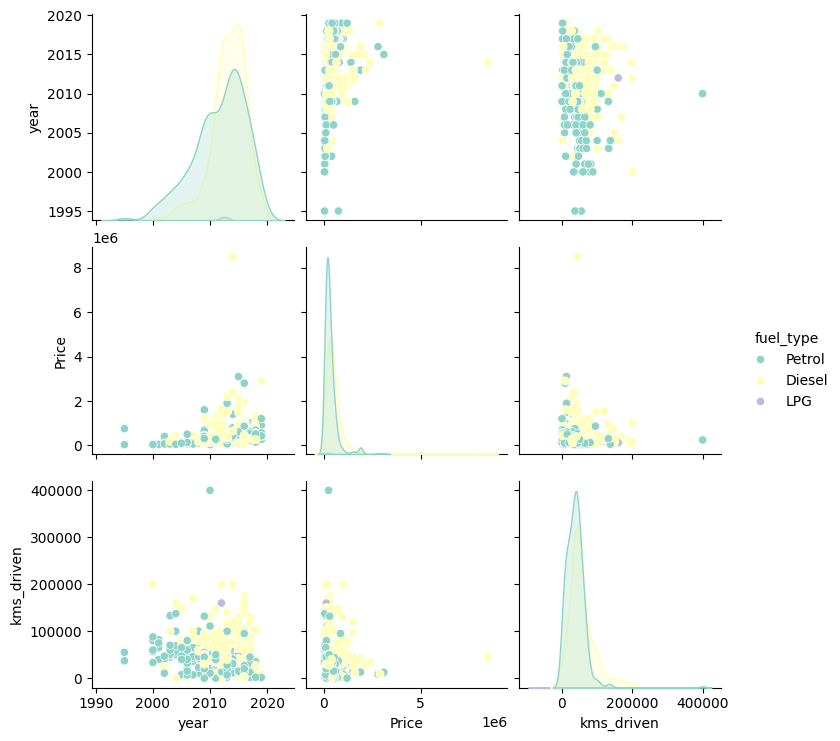

In [187]:
sns.pairplot(cars,hue='fuel_type')

# analysis by groupby

In [199]:
# top company hight car price

top=cars.groupby("company")
top.size()

company
Audi           11
BMW             8
Chevrolet      34
Datsun          7
Fiat            4
Force           4
Ford           30
Hindustan       3
Honda          60
Hyundai       139
Jaguar          2
Jeep            1
Land            1
Mahindra       98
Maruti        221
Mercedes        6
Mini            8
Mitsubishi      6
Nissan          6
Renault        33
Skoda          13
Tata           65
Toyota         36
Volkswagen     19
Volvo           1
dtype: int64

In [202]:
top["Price"].sum().sort_values(ascending=False).head(10)

company
Maruti      59634099
Mahindra    59136796
Hyundai     44257987
Honda       20857975
Toyota      18879994
Audi        16246000
Renault     15196905
Mini        15128888
Ford        14393997
Tata        13061054
Name: Price, dtype: int32

<Axes: title={'center': 'Top 10 Company high car price'}, ylabel='Price'>

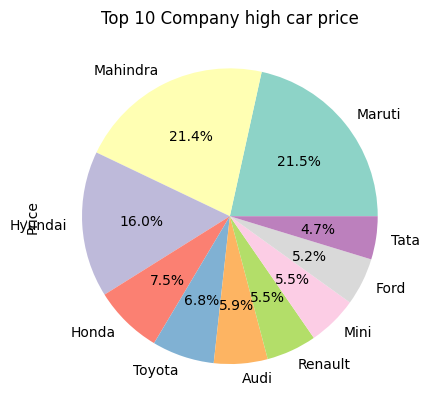

In [205]:
top["Price"].sum().sort_values(ascending=False).head(10).plot(kind="pie",autopct='%0.1f%%',title="Top 10 Company high car price")

In [207]:
# most selling car by fuel

fuel=cars.groupby("fuel_type")
fuel.size()

fuel_type
Diesel    386
LPG         2
Petrol    428
dtype: int64

In [210]:
fuel.count()

,name,company,year,Price,kms_driven
fuel_type,,,,,
Diesel,386,386,386,386,386
LPG,2,2,2,2,2
Petrol,428,428,428,428,428


In [213]:
fuel_count = cars['fuel_type'].value_counts().sort_values(ascending=False)
fuel_count

fuel_type
Petrol    428
Diesel    386
LPG         2
Name: count, dtype: int64

<Axes: xlabel='fuel_type'>

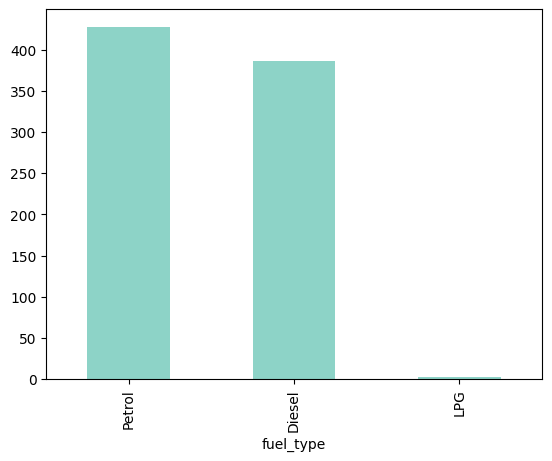

In [215]:
fuel_count.plot(kind="bar")

In [219]:
top["fuel_type"].value_counts().sort_values(ascending=False)

company     fuel_type
Maruti      Petrol       159
Hyundai     Petrol       112
Mahindra    Diesel        95
Maruti      Diesel        60
Tata        Diesel        50
Honda       Petrol        45
Hyundai     Diesel        27
Renault     Diesel        25
Chevrolet   Diesel        21
Toyota      Diesel        20
Ford        Diesel        19
Toyota      Petrol        16
Tata        Petrol        15
Honda       Diesel        15
Chevrolet   Petrol        13
Volkswagen  Diesel        13
Ford        Petrol        11
Skoda       Diesel         9
Renault     Petrol         8
Mini        Petrol         8
Audi        Diesel         7
Datsun      Petrol         7
Volkswagen  Petrol         6
BMW         Diesel         5
Skoda       Petrol         4
Mitsubishi  Diesel         4
Force       Diesel         4
Mercedes    Petrol         4
Audi        Petrol         4
Nissan      Diesel         3
            Petrol         3
Fiat        Petrol         3
Mahindra    Petrol         3
BMW         Petrol   

In [221]:
year=cars.groupby("year")
year.size()

year
1995      2
2000      7
2001      5
2002      4
2003     13
2004     12
2005     13
2006     22
2007     19
2008     16
2009     54
2010     43
2011     59
2012     75
2013     94
2014     92
2015    111
2016     74
2017     53
2018     30
2019     18
dtype: int64

In [222]:
year.count()

,name,company,Price,kms_driven,fuel_type
year,,,,,
1995,2,2,2,2,2
2000,7,7,7,7,7
2001,5,5,5,5,5
2002,4,4,4,4,4
2003,13,13,13,13,13
2004,12,12,12,12,12
2005,13,13,13,13,13
2006,22,22,22,22,22
2007,19,19,19,19,19


# Extracting Training Data

In [255]:
cars.to_csv('Cleaned_Car_data.csv')

In [268]:
X=cars[['name','company','year','kms_driven','fuel_type']]
y=cars['Price']

In [269]:
# advance

X=cars.drop(columns="Price")
y=cars["Price"]

# Applying Train Test Split

In [270]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [271]:
from sklearn.linear_model import LinearRegression

In [272]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score

## Creating an OneHotEncoder object to contain all the possible categories

In [273]:
ohe=OneHotEncoder()
ohe.fit(X[['name','company','fuel_type']])

OneHotEncoder()

## Creating a column transformer to transform categorical columns

In [274]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','company','fuel_type']),
                                    remainder='passthrough')

## Linear Regression Model

In [275]:
lr=LinearRegression()

## Making a pipeline

In [276]:
pipe=make_pipeline(column_trans,lr)

## Fitting the model

In [277]:
pipe.fit(X_train,y_train)

C:\Users\navgurukul\anaconda3\envs\myasha\Lib\site-packages\sklearn\compose\_column_transformer.py:1624: FutureWarning: 
The format of the columns of the 'remainder' transformer in ColumnTransformer.transformers_ will change in version 1.7 to match the format of the other transformers.
At the moment the remainder columns are stored as indices (of type int). With the same ColumnTransformer configuration, in the future they will be stored as column names (of type str).
To use the new behavior now and suppress this warning, use ColumnTransformer(force_int_remainder_cols=False).

  warnings.warn(


Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3 Cabriolet 40 TFSI',
       'Audi A4 1.8 TFSI Multitronic Premium Plus',
       'Audi A4 2.0 TDI 177bhp Premium', 'Audi A6 2.0 TDI Premium',
       'Audi A8', 'Audi Q3 2.0 TDI quattro Premium',
       'Audi Q5 2.0 TDI quattro Premium Plus', 'Audi Q7',
       'BMW 3 Series 320d...
                                                                            array(['Audi', 'BMW', 'Chevrolet', 'Datsun', 'Fiat', 'Force', 'Ford',
       'Hindustan', 'Honda', 'Hyundai', 'Jaguar', 'Jeep', 'Land',
       'Mahindra', 'Maruti', 'Mercedes', 'Mini', 'Mitsubishi', 'Nissan',
       'Renault', 'Skoda', 'Tata', 'Toyota', 'Volkswagen', 'Volvo'],
      dtype=object),
                                                                            array(['Diesel', 'LPG', 'Petrol'], dtype=object)]),
                                                  ['name', 'company',
                                                   'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [278]:
y_pred=pipe.predict(X_test)

## Checking R2 Score

In [279]:
r2_score(y_test,y_pred)

0.7410118440981793